# Imports

In [27]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

In [28]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'becker': {'filename': 'beckerestimation_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'mean_pre_discussion_error',
   'mean_post_discussion_error',
   'mean_pre_discussion_error_pct',
   'mean_post_discussion_error_pct',
   'question',
   'chatrooms',
   'trial_indx']},
 'csop': {'filename': 'csop_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'round_num',
   'round_index',
   'task_index',
   'complexity',
   'type',
   'social_perceptiveness',
   'skill',
   'normalized_score',
   'zscore_score',
   'zscore_round_duration',
   'zscore_efficiency']},
 'csopII': {'filename': 'csopII_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'vis_img',
   'int_verb',
   'ort_img',
   'rep_man',
   'soc_pers',
   'team_size',
   'difficulty',
   'score',
   'duration',
   'efficiency',
   'timestamp']},
 'dat': {'filename': 'DAT_output_conversation_level.csv',
  'cols_to_ignore':

# Train Model on CSOP I and Test on CSOP II

In [29]:
csop_model = ModelBuilder(dataset_names = ["csop"], test_dataset_names=["csopII"])

In [30]:
csop_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
0,0.429630,0.463768,15.000000,12.027746,2,31,84.333333,73.721699,8,184,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1,0.345679,0.350282,9.000000,5.715476,2,16,39.333333,25.328947,9,71,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
2,0.050000,0.073034,10.000000,1.000000,9,11,44.500000,6.500000,38,51,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
3,0.179487,0.173824,26.000000,9.273618,13,34,108.666667,38.732702,54,139,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
4,0.166667,0.202834,33.333333,10.964589,18,43,149.000000,56.166419,75,211,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
975,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
976,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
977,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0


In [31]:
csop_model.select_target(target = "zscore_efficiency")

In [32]:
csop_model.select_test_target(target = "efficiency")

Checking Holdout Sets...Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3913	MAE: 0.5235	MSE: 0.5873	RMSE: 0.7664
Validation Set:	R2: 0.2148	MAE: 0.7375	MSE: 1.0241	RMSE: 1.012
Test Set:	R2: 0.1084	MAE: 0.7244	MSE: 0.8907	RMSE: 0.9438


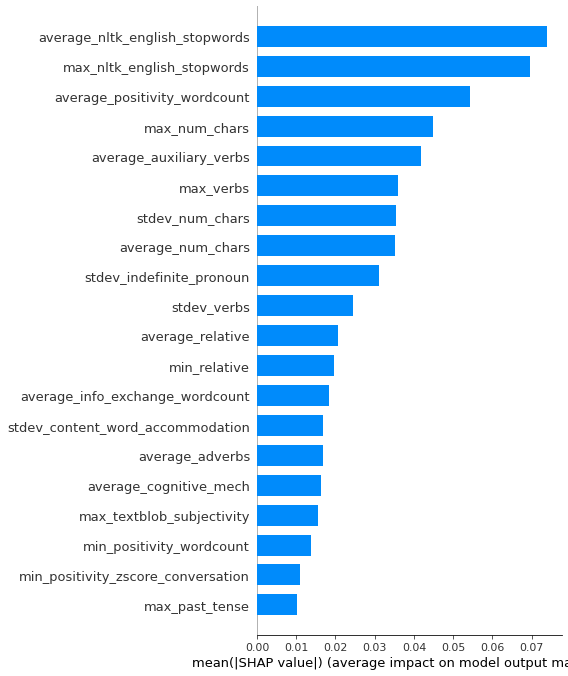

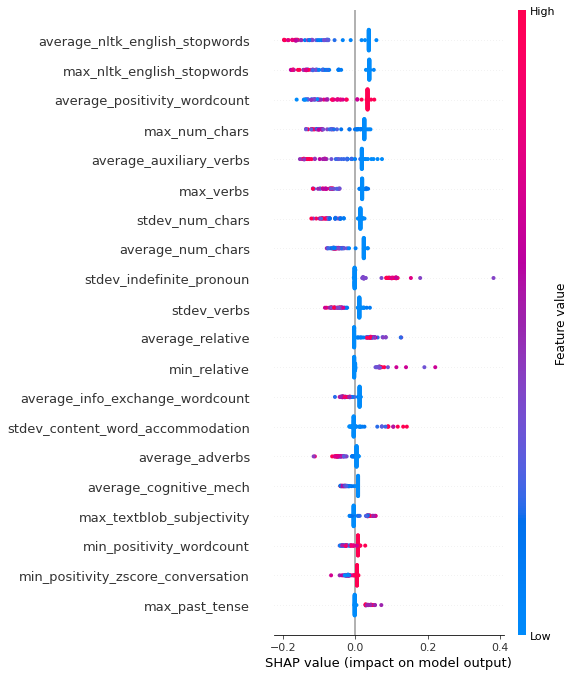

In [33]:
csop_model.define_model(model_type = 'rf')
csop_model.evaluate_model(csop_model.baseline_model)

# Train Model on a Blended CSOP Model

In [34]:
csop_blended_model = ModelBuilder(dataset_names = ["csop", "csopII"])

In [35]:
csop_blended_model.select_target(target=["zscore_efficiency", "efficiency"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3769	MAE: 0.5258	MSE: 0.61	RMSE: 0.781
Validation Set:	R2: 0.154	MAE: 0.7082	MSE: 0.888	RMSE: 0.9423
Test Set:	R2: 0.1818	MAE: 0.7078	MSE: 0.9099	RMSE: 0.9539


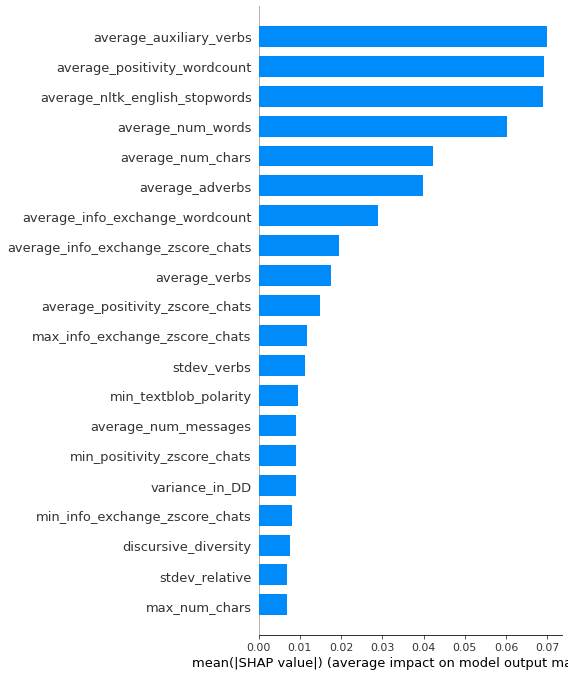

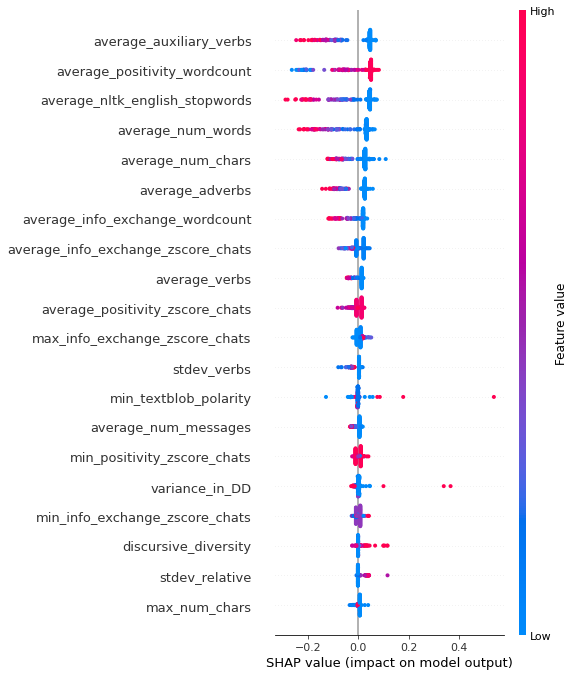

In [36]:
csop_blended_model.define_model(model_type = 'rf')
csop_blended_model.evaluate_model(csop_blended_model.baseline_model)

### Emily Checking Train-Test Split Functionality

In [37]:
csop_blended_model.X_train

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
181,-0.617558,-0.626069,-0.421840,-0.457642,-0.266645,-0.449661,-0.442943,-0.460828,-0.295394,-0.462938,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
1078,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
1798,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
218,2.301816,2.313980,0.204452,0.847804,-0.420042,0.346343,0.255500,0.925517,-0.432447,0.400445,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
1246,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
902,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
349,0.789997,1.050233,1.069332,0.856838,1.267317,1.036213,0.953943,1.077861,1.075132,1.068127,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
751,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
csop_blended_model.X_val

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
585,-0.617558,-0.626069,-0.332370,-0.457642,-0.113249,-0.396594,-0.364245,-0.460828,-0.158341,-0.416891,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
481,-0.617558,-0.626069,0.114982,-0.457642,0.653732,-0.131259,0.186639,-0.460828,0.801027,-0.094561,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
893,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
1417,1.188805,1.025127,-0.153429,-0.041611,-0.420042,-0.131259,-0.133070,-0.080888,-0.226868,-0.094561,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
525,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,0.131492,0.109321,1.949124,0.603033,2.801279,1.301547,2.085223,0.644738,3.028132,1.378945,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
339,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
129,0.765304,0.548506,-0.034136,-0.029347,0.040147,-0.025125,-0.062570,-0.134928,0.047238,-0.094561,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
1402,-0.085815,-0.200100,4.096412,0.929394,6.175995,2.681287,3.875596,0.609641,6.180343,2.415004,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
csop_blended_model.X_test

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
1605,1.536658,1.519345,0.786009,1.054901,-0.113249,1.142347,0.934268,1.247803,-0.021289,1.424992,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
1502,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
70,-0.617558,-0.626069,0.293922,-0.457642,0.960524,-0.025125,0.147291,-0.460828,0.732501,-0.117585,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
976,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
1052,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
1869,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
1704,-0.617558,-0.626069,-0.511311,-0.457642,-0.420042,-0.502728,-0.521640,-0.460828,-0.432447,-0.508985,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0
115,0.889988,0.930834,1.218449,0.954498,0.807128,1.036213,1.373664,1.119548,0.903817,1.206268,...,0.0,-2.220446e-16,-2.220446e-16,1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0


# Juries Model

In [40]:
juries_model = ModelBuilder(dataset_names = ["juries"])

In [41]:
juries_model.select_target(target=["majority_pct"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8649	MAE: 0.3223	MSE: 0.1393	RMSE: 0.3732
Validation Set:	R2: -0.0951	MAE: 0.772	MSE: 0.8392	RMSE: 0.9161
Test Set:	R2: 0.1485	MAE: 0.7185	MSE: 0.7336	RMSE: 0.8565


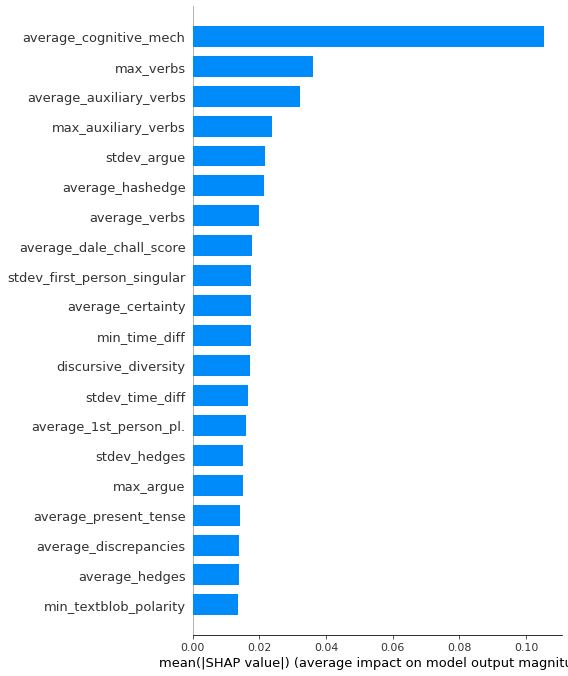

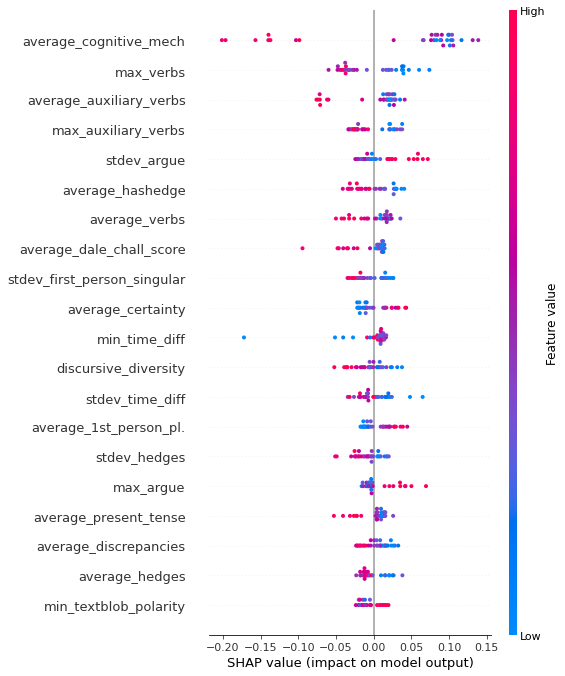

In [42]:
juries_model.define_model(model_type = 'xgb')
juries_model.evaluate_model(csop_blended_model.baseline_model)

# Multi-Task Joint Model

In [43]:
joint_model = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"])

In [44]:
joint_model.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

In [45]:
# has combined targets
joint_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive,target_raw,target_std
0,0.159463,0.166055,107.000000,33.948490,30,140,536.625000,168.104088,183,725,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
1,0.125695,0.124663,109.833333,28.457083,76,169,576.666667,151.855926,433,903,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.600000,-1.370166
2,0.224885,0.220860,66.428571,27.338393,18,114,346.142857,141.756762,124,619,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.666667,-0.979051
3,0.261432,0.248455,86.600000,42.898019,25,159,446.600000,211.715469,122,789,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.750000,-0.490158
4,0.113767,0.106352,132.200000,28.237564,103,183,677.000000,140.125658,543,934,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,76.599130,-0.959289
2580,0.333333,0.371585,14.666667,9.568467,6,28,61.000000,44.452222,21,123,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,82.905364,0.131140
2581,0.183908,0.189744,9.666667,3.299832,6,14,43.333333,15.326085,23,60,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,83.106215,0.165870
2582,0.180556,0.177709,18.000000,5.958188,11,30,85.375000,27.417775,51,131,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,90.162293,1.385957


In [46]:
# joint_model.viz_target()

## XGBoost

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.5158	MAE: 0.3835	MSE: 0.4853	RMSE: 0.6966
Validation Set:	R2: 0.0721	MAE: 0.7023	MSE: 0.9168	RMSE: 0.9575
Test Set:	R2: 0.138	MAE: 0.6939	MSE: 0.8457	RMSE: 0.9196


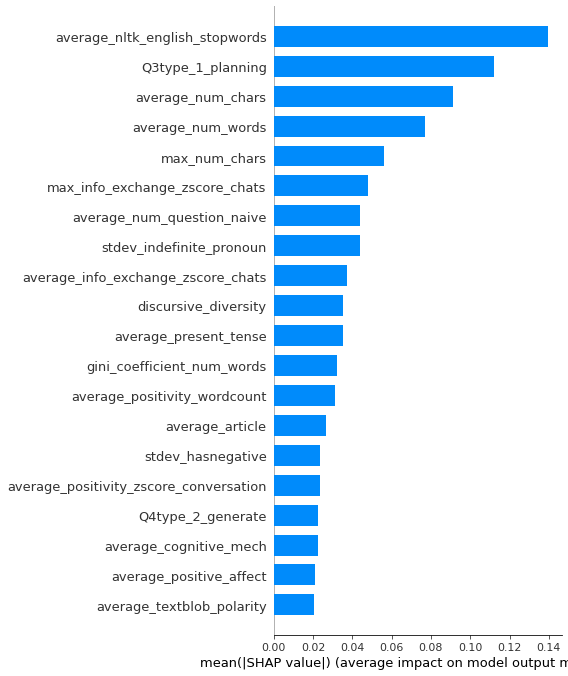

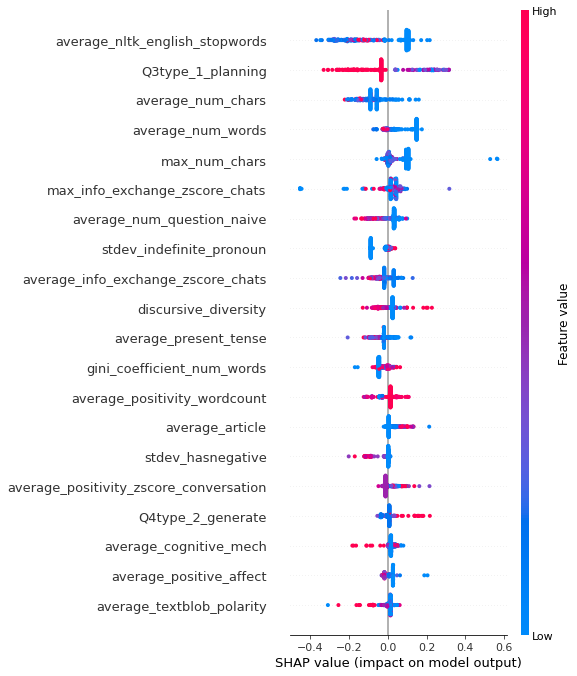

In [47]:
joint_model.define_model(model_type = 'xgb')
joint_model.evaluate_model(joint_model.baseline_model)

## Lasso

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.1653	MAE: 0.687	MSE: 0.8366	RMSE: 0.9147
Validation Set:	R2: 0.099	MAE: 0.7143	MSE: 0.8902	RMSE: 0.9435
Test Set:	R2: 0.0888	MAE: 0.7116	MSE: 0.894	RMSE: 0.9455


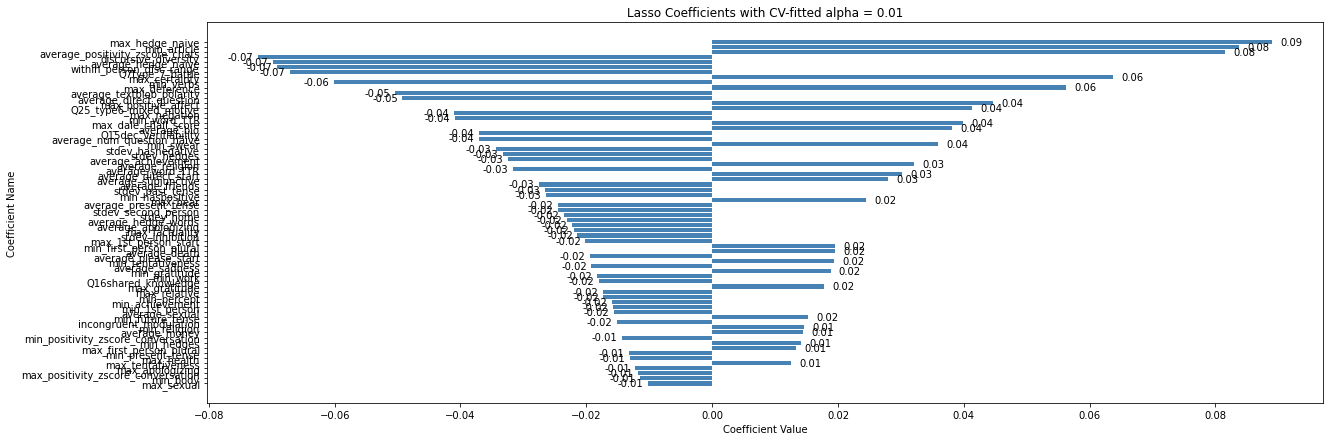

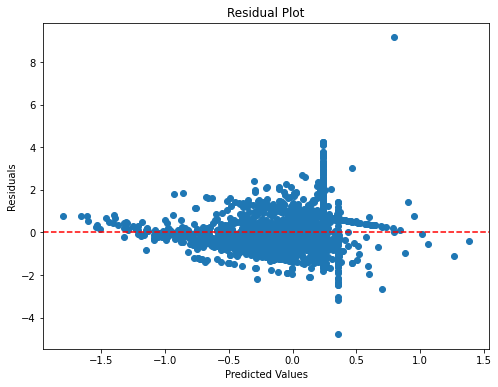

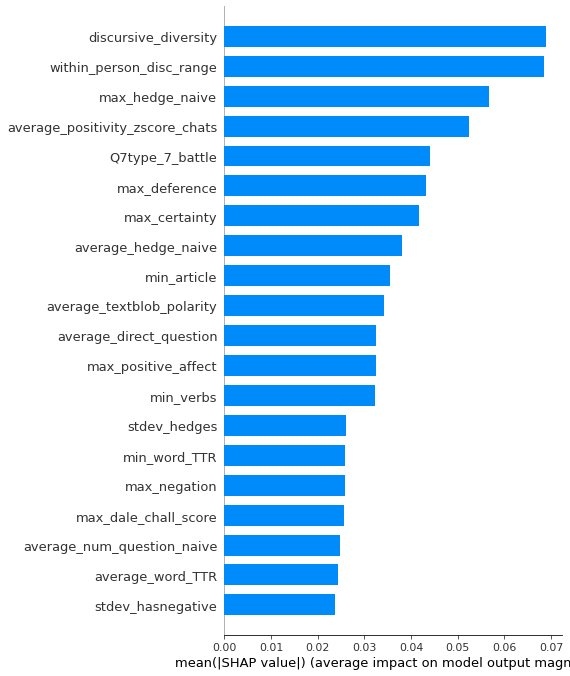

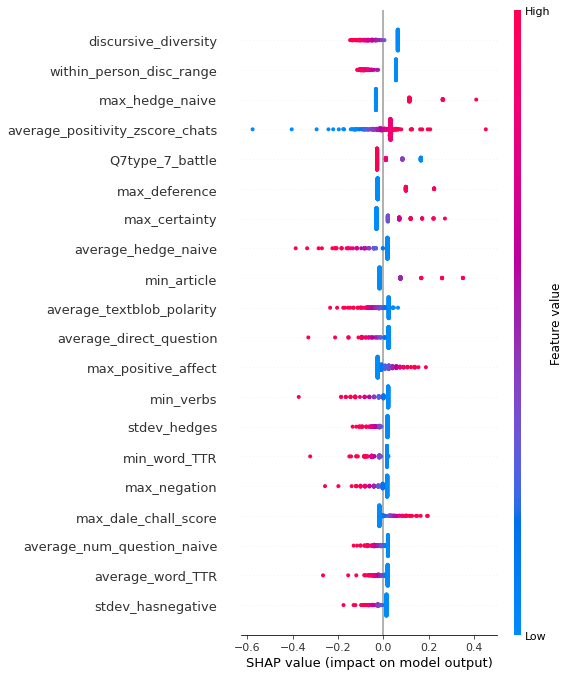

In [48]:
joint_model.define_model(model_type = 'lasso')
joint_model.evaluate_model(joint_model.baseline_model)

## Linear Regression

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.2712	MAE: 0.6371	MSE: 0.7305	RMSE: 0.8547
Validation Set:	R2: -0.037	MAE: 0.758	MSE: 1.0246	RMSE: 1.0122
Test Set:	R2: -0.1801	MAE: 0.8111	MSE: 1.1578	RMSE: 1.076


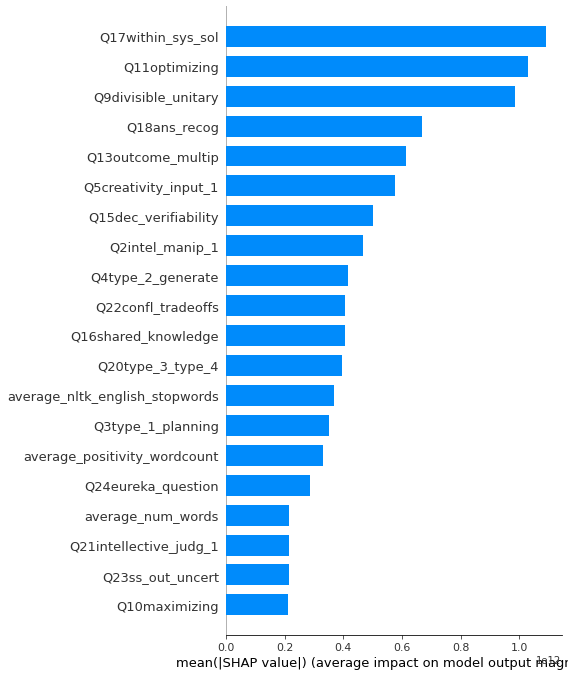

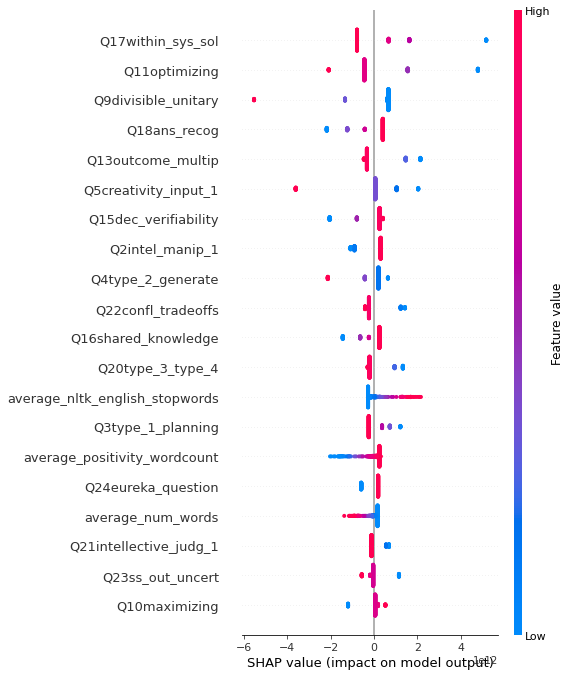

In [49]:
joint_model.define_model(model_type = 'linear')
joint_model.evaluate_model(joint_model.baseline_model)

## Random Forest

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4645	MAE: 0.4858	MSE: 0.5367	RMSE: 0.7326
Validation Set:	R2: 0.1525	MAE: 0.6734	MSE: 0.8373	RMSE: 0.915
Test Set:	R2: 0.1926	MAE: 0.6622	MSE: 0.7921	RMSE: 0.89


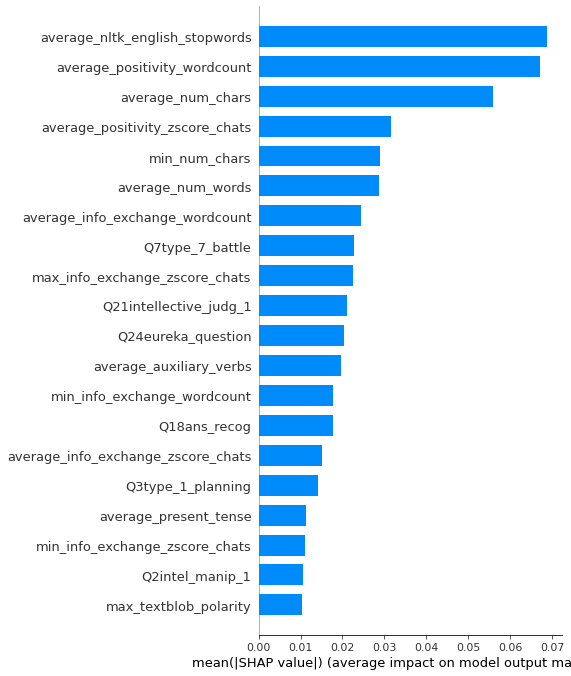

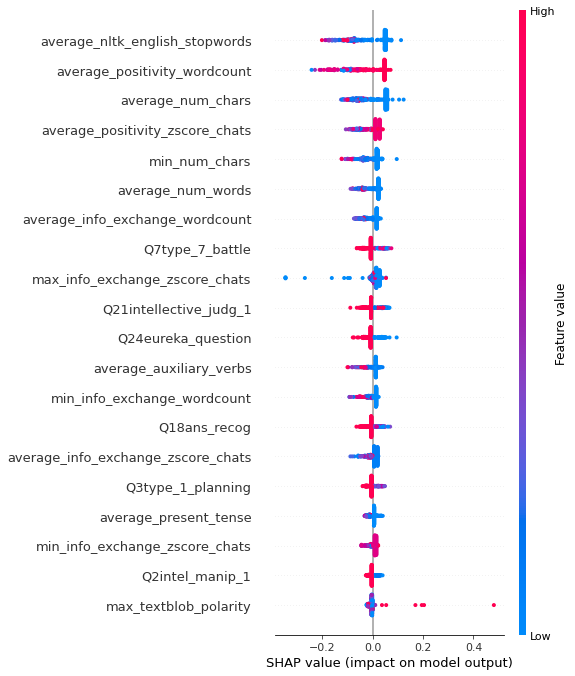

In [50]:
joint_model.define_model(model_type = 'rf')
joint_model.evaluate_model(joint_model.baseline_model)